<!-- ENG -->
# Exercises in Fundamentals of Data Science ④

※Distribution or redistribution of these exercise materials without the copyright holder's permission is not permitted.


<!-- ENG -->
　Each variable in data is correlated with each other. For example, if you say July 19, you may think of the hot summer season, and if you say December 15, you may think of the cold winter. Or, if the weather is said to be sunny, it seems warm, and if it is raining, it seems cold. If it is snow, it will be obvious that the temperature is low. **Principal component analysis (PCA) is an attempt to reduce the number of related variables (by projecting multiple variables to a lower-dimensional space)**, such as "date," "weather," and "temperature".


　In this exercise, we are going to use handwritten character string data to explain what kind of variables are created by dimension reduction, to what extent the original data can be reproduced after dimension reduction, and the relationship between PCA and linear algebra in the following four sections.

<!-- ENG -->
- **DS4.0 | Digits data set**
- **DS4.1 | Applying PCA to the digits data set**
- **DS4.2 | Reconstruction from principal components**
- **DS4.3 | Eigenvalues ​​of the variance-covariance matrix in PCA**


<!-- ENG -->
## DS4.0 | Digits data set

　Here, we use digits data, which is handwritten character string recognition. Digits is a data set consisting of a black and white image of a single handwritten number (0-9) and the corresponding correct number.

　In this case, we will `import` and use the data that exists in scikit-learn, so there is no need to upload files.

In [68]:
from sklearn import datasets
import matplotlib.pyplot as plt

d = datasets.load_digits()

<!-- ENG -->
First, let's take a look at what kind of information the data contains.

The `dir()` function can get a list of the data that its argument has.

In [69]:
print(dir(d))

['DESCR', 'data', 'images', 'target', 'target_names']


<!-- ENG -->
`DESCR` is the description of the data set, `data` is the image data in vector format, `images` is the image data in image format, `target` is the number from 0-9 corresponding to the image, and `target_names` is the list of targets (`[0, 1, ..., 9]`).

<!-- ENG -->
The input data `d.data` which corresponds to an image is a matrix in which each row corresponds to one image and each column contains the values corresponding to each pixel of the image. The input image in this case has a resolution of 8x8, so the number of columns is 64.

In [70]:
data = d.data
print(data.shape[1]) # show the number of columns of data
print(data) # show data

64
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


<!-- ENG -->
The data `images` that correspond to the images are stored in a format like an array list.

Now, let's try to display the image and number correspondence. In the cell below, the image of the number specified by the variable `image_index` can be displayed.

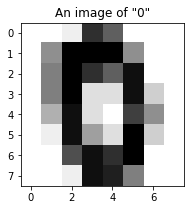

In [71]:
# display digits image
# change image_index and see each image with its label

images = d.images # images ("list of array"-like)
target = d.target # corresponding label numbers

image_index = 72
plt.figure(1, figsize=(3, 3))
plt.imshow(images[image_index], cmap=plt.cm.gray_r)
plt.title(f'An image of "{target[image_index]}"')
plt.show()

<!-- ENG -->
Now, for these numbers 0 through 9,
* Which numbers would be similar to each other and which numbers would not be similar to each other?
* Can we easily find out how these numbers are distributed over a 64-dimensional space?
* Which part of the 8x8 image characterizes the data?

One of the methods that can tell us these features is principal component analysis (PCA).

---

<!-- ENG -->
##### Exercise DS4.1
　Let’s look into each of the following regarding the digits data set:
1. Total number of images
2. The number which has the lowest data items (if there are multiple numbers with the lowest number, the number with the lowest value among them)

 

(Hint: There are more than 1,000 items, so it is difficult to search them visually. Use a `for` statement to search more efficiently.)

In [72]:
print(len(d.images))

1797


In [73]:
print(len(d.data))

1797


In [74]:
length = len(d.data)
print(length)
count=[0,0,0,0,0,0,0,0,0,0]

for i in range(len(d.data)):
  for j in range(10):
    if target[i] == j:
     count[j] +=1
  
"8"
print(count)


1797
[178, 182, 177, 183, 181, 182, 181, 179, 174, 180]


---

<!-- ENG -->
## DS4.1 | Applying PCA to the digits data set

　Principal component analysis (PCA) is one of the unsupervised learning methods used in visualization and dimension reduction, which can project data into a low-dimensional space while preserving information about the variability of the data set.

First, let's use PCA to project the data into two dimensions and see which numbers correspond to where in space.

In [75]:
# prepare PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2 components will be used
pca.fit(data) # obtain principal component
images_map = pca.transform(data) # transform input data using PCA

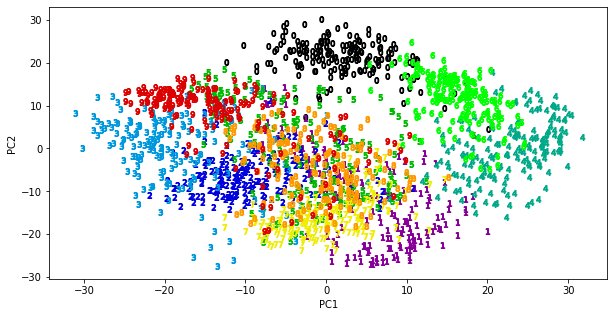

In [76]:
# scatter plot of PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
n_labels = 10

# set color palette for plot
color = [plt.cm.nipy_spectral(i/n_labels, 1) for i in range(n_labels)] 

# plot by each label
for i in range(n_labels):
  plt.scatter(images_map[target==i, 0], images_map[target==i, 1], 
              color=color[i], marker=f"${i}$")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

<!-- ENG -->
If it has executed correctly, each number should be output along the values of the first two principal components.

What can we say from the above diagram? For example, we can see that 0 and 4 are distributed relatively far from other numbers, and that 5, 8, and 9 are distributed close to each other. It means that the shape of 0 and 4 are quite different from each other while that of 5, 8, and 9 are more similar to each other.

In this example, the distribution of the data can be visualized to some extent by reducing the 64 dimensional data to two dimensions. On the other hand, there is a large overlap between the numbers, indicating that the information in the image cannot be adequately represented in two dimensions alone.

<!-- ENG -->
　Also, in PCA, by looking at the value of each principal component (eigenvector), it is possible to check which columns each principal component is mainly composed of.
Principal component loading is a normalized value created by multiplying the eigenvector by the positive square root of the corresponding eigenvalue.

Let's take a look at the breakdown of each of the top three principal components.

In [77]:
import pandas as pd

pca = PCA(n_components=3).fit(data) # PCA, use 3 components
components = pca.components_ # get components from PCA result

eigenvalues = pca.explained_variance_


indexes = ["PC1", "PC2", "PC3"]
print(pd.DataFrame(components, index=indexes)) # print shaped result

print(eigenvalues)

               0         1         2   ...        61        62        63
PC1 -3.245107e-18 -0.017309 -0.223429  ... -0.089418 -0.036598 -0.011468
PC2 -2.548224e-17 -0.010106 -0.049085  ...  0.176697  0.019455 -0.006697
PC3  1.105429e-17  0.018342  0.126476  ...  0.232084  0.167027  0.034804

[3 rows x 64 columns]
[179.0069301  163.71774688 141.78843909]


<!-- ENG -->
　Since this doesn't give us a clear picture of everything, let's visualize it by reformatting the eigenvectors into the same format as the image and using colors to indicate the size of the values.

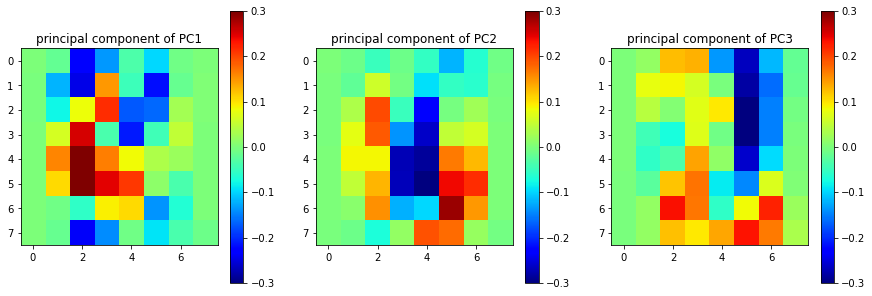

In [78]:
# show components on image

import numpy as np
fig = plt.figure(figsize=(15, 5))
for i in range(3): # for each component:
  
  plt.subplot(1, 3, i+1) # Draw a diagram by dividing it into three parts. When i=0, the leftmost (i+1 = 1st).
  components_reshape = np.reshape(components[i], images[0].shape) # 1D vector -> 2D image-like format

  im = plt.imshow(components_reshape, cmap=plt.cm.jet)
  im.set_clim(-0.3,0.3) # set color range
  plt.title("principal component of PC"+str(i+1))

  plt.colorbar()

plt.show()

<!-- ENG -->
　Here, it should be noted that the explanatory variables with larger **absolute values** can be said to be more expressive of the variance of the data, **rather than the positive or negative sign** of each value of the eigenvector.

<!-- ENG -->
　The explained variance ratio of each principal component corresponds to how much of the variance of the original data (i.e., the sum of the eigenvalues of the covariance matrix) the principal component (and its corresponding eigenvalue) has. Let's actually look at the explained variance ratio using the top five principal components.

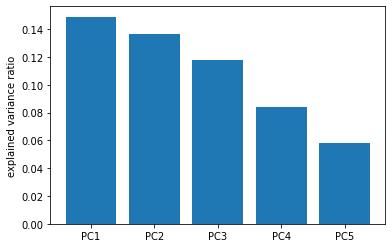

In [79]:
n_components = 5
indexes = [f"PC{i+1}" for i in range(n_components)]
fig = plt.figure(figsize=(6,4))

pca = PCA(n_components=n_components).fit(data) # PCA, use 5 components
explained_variance = pca.explained_variance_ratio_ # explained ratio
plt.bar(np.arange(n_components), explained_variance,
        tick_label=indexes)
plt.ylabel("explained variance ratio")
plt.show()

<!-- ENG -->
Similarly, the cumulative explained variance ratio is as follows.

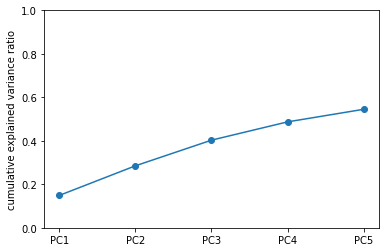

In [80]:
fig = plt.figure(figsize=(6,4))
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(n_components), cumulative_explained_variance, marker="o")
plt.xticks(range(n_components), indexes)
plt.ylim(0, 1)
plt.ylabel("cumulative explained variance ratio")
plt.show()

<!-- ENG -->
In PCA, eigenvalues are used in order of increasing value, so the explained variance ratio gradually decreases.
 
Since the explained variance ratio total of all principal components is 1, the cumulative explained variance ratio can be used as a criterion to determine how many principal components to use. In this case, 0.7 or 0.8 is sometimes used as an approximate estimate of the cumulative explained variance ratio.

---

<!-- ENG -->
##### Exercise DS4.2
　Based on the results of the PCA above, for the images in the digits data set, discuss what regions of the image can be said to represent the variance of the data (or varies greatly from data to data).

---

<!-- ENG -->
##### Exercise DS4.3
　When conducting PCA, pre-processing is performed so that the mean of each variable becomes zero, called centering (**Supplementary Material S1**). For example, in the case of this image, it is an operation that sets the average value of the top left pixel to 0 in the data set.
　`PCA()` in scikit-learn does the centering automatically, but let's get to know the specific process. The code below shows the function `centering(X)` that performs centering on the input data set (set of data). Use this to center the `d.data`.
Note that the report should contain the largest value of the first image `data[0, :]` after centering, rounded to the two decimal place.


In [81]:
def centering(X):
  return X - np.mean(X, axis=0)

In [82]:
centered = centering(d.data)

In [83]:
centered[0, :]

array([ 0.00000000e+00, -3.03839733e-01, -2.04785754e-01,  1.16416249e+00,
       -2.84808013e+00, -4.78185865e+00, -1.36227045e+00, -1.29660545e-01,
       -5.56483027e-03, -1.99387869e+00,  2.61769616e+00,  3.02058987e+00,
       -2.79354480e-01,  6.82415136e+00,  3.15358932e+00, -1.07957707e-01,
       -2.78241514e-03,  3.98441848e-01,  5.09682805e+00, -4.99276572e+00,
       -7.09794101e+00,  3.19365609e+00,  6.21146355e+00, -5.00834725e-02,
       -1.11296605e-03,  1.53032832e+00,  2.90873678e+00, -8.82136895e+00,
       -9.92710072e+00,  4.48525320e-01,  5.68224819e+00, -2.22593211e-03,
        0.00000000e+00,  2.66054535e+00,  3.32776850e-01, -9.07178631e+00,
       -1.03016138e+01,  2.55982193e-01,  5.09070673e+00,  0.00000000e+00,
       -8.90372844e-03,  2.41624930e+00,  4.11853088e+00, -7.22815804e+00,
       -6.67223150e+00,  3.76349471e+00,  3.54368392e+00, -2.72676683e-02,
       -7.23427935e-03,  1.29549249e+00,  6.49304396e+00, -4.53923205e+00,
        5.83750696e-01,  

---

<!-- ENG -->
## DS4.2 | Reconstructing from principal components

　Let's take a closer look at the loss of information in dimension reduction using principal component analysis (PCA). After performing PCA, the original matrix can be approximated in a smaller dimension by keeping only a few principal components. At this point, how much of the original data information remains? This can be visually confirmed by performing dimension reduction with PCA and then performing an inversion on the results to return the data to its original format.

<!-- ENG -->
　By running the group of cells below several times with different `n_components`, we can see the relationship between the number of dimensions used and the results after the restoration. The better the accuracy of the restoration is, the more information remains.

　In the group of cells below, the top cell is the function that performs the transformation and inversion, and the bottom two cells are the part that performs plotting. The number of dimensions to be reduced can be specified by `n_components`, and the number of the images to be displayed can be specified by `image_index`. Since the original image is 64 dimensions, specify a value between 1 and 64 for `n_components`.

In [84]:
def project_reconstruct(data, n_components):
  pca = PCA(n_components=n_components)
  pca.fit(data)
  data_map = pca.transform(data) # projection
  data_reconstructed = pca.inverse_transform(data_map) # reconstruction
  sum_explained_variance_ratio = np.sum(pca.explained_variance_ratio_)

  return data_reconstructed, sum_explained_variance_ratio

In [85]:
data = datasets.load_digits().data
# project and reconstruct of data by PCA
n_components = 3 # the number of components to be used

data_reconstructed, sum_explained_variance_ratio = \
  project_reconstruct(data, n_components)
print(f"Cumulative explained variance ratio: {sum_explained_variance_ratio:.4f}")

Cumulative explained variance ratio: 0.4030


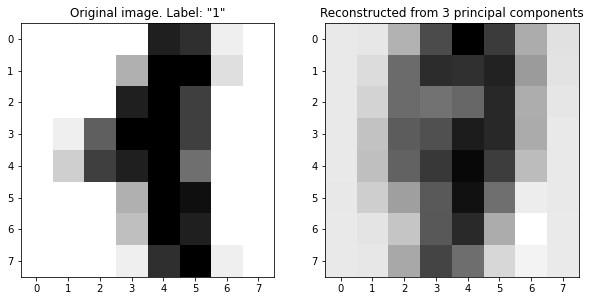

In [86]:
# show above result
image_index = 11 # the index of image to be shown
image_reconstructed = np.reshape(data_reconstructed[image_index],
                                 images[0].shape)

fig = plt.figure(figsize=(10, 5))

# show original image
plt.subplot(1, 2, 1)
plt.imshow(images[image_index], cmap=plt.cm.gray_r)
plt.title(f'Original image. Label: "{target[image_index]}"')

# show reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed, cmap=plt.cm.gray_r)
plt.title(f"Reconstructed from {n_components} principal components")

plt.show()

<!-- ENG -->
From the execution result, it can be seen that the greater the number of dimensions left, the better the accuracy of restoration is, which means the more information remains.

　In this way, if the original data can be captured visually, the number of principal components that should be used can be determined even by actually restoring the data.

---

<!-- ENG -->
## DS4.3 | Eigenvalues ​​of the variance-covariance matrix in PCA

　As we have already demonstrated in the lecture, the principal components and their explained variance ratio used in principal component analysis (PCA) can be obtained from the eigenvectors and eigenvalues of the variance-covariance matrix (also called simply the covariance matrix) of the original data. `PCA.fit` performs a process equivalent to "calculate the eigenvectors and eigenvalues of the variance-covariance matrix, output them by sorting in order of magnitude" (**Supplementary Material S2**).

　In this section, we will perform this calculation **without going through scikit-learn** and confirm that the results are similar to PCA in scikit-learn.

In [87]:
# The same function as that of Exercise DS4.3
def centering(X):
  return X - np.mean(X, axis=0)

In [88]:
# Calculate covariance matrix
data_centered = centering(data)
cov_matrix = np.cov(data_centered, rowvar=False)

In [89]:
# Calculate eigenvalue/eigenvector of covariance matrix
from numpy.linalg import eig
eig_val, eig_vec = eig(cov_matrix)

# Sort by eigenvector (descending)
n_components = 3
eig_index = np.argsort(eig_val)      # argsort arranges the index in ascending order by element
eig_index = eig_index[::-1]          # Reverse the order with [::-1] to get the descending order
eig_index = eig_index[:n_components] # Get only n_components index in descending order
eig_val = eig_val[eig_index]         # Get eigenvalues in increasing order
eig_vec = eig_vec.T[eig_index]       # Get the corresponding eigenvector

In [90]:
print(eig_val)

[179.0069301  163.71774688 141.78843909]


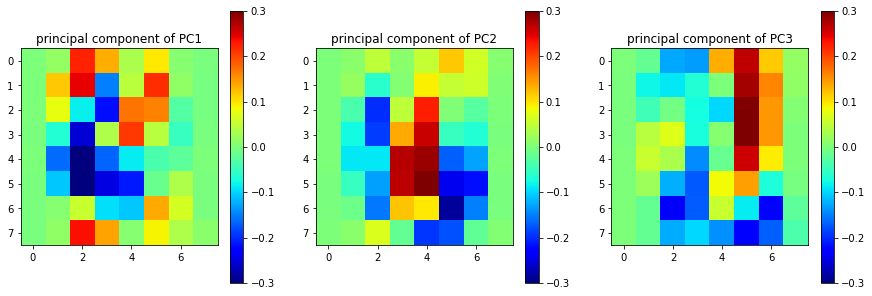

In [91]:
# show

fig = plt.figure(figsize=(15, 5))
for i in range(n_components):
  
  plt.subplot(1, n_components, i+1)
  eig_vec_reshape = np.reshape(eig_vec[i], images[0].shape)

  im = plt.imshow(eig_vec_reshape, cmap=plt.cm.jet)
  im.set_clim(-0.3,0.3)
  plt.title("principal component of PC"+str(i+1))
  plt.colorbar()
    
plt.show()

<!-- ENG -->
　By looking at the principal components (eigenvectors), we can confirm that the results are similar to `PCA` in scikit-learn.
In some cases, the sign of the principal component is reversed, but the meaning is the same, just that the direction of the vector is opposite.

---

<!-- ENG -->
##### Exercise DS4.4
　Now that we have confirmed that the eigenvectors are equal, let's make sure that the eigenvalues are also equal.
Check that the eigenvalues calculated by `PCA()` and the eigenvalues calculated directly match, and answer the largest eigenvalue as an integer, rounded to the nearest whole number.
Note that the eigenvalues of the results calculated by `PCA()` can be obtained by `pca.extracted_variance_`.


---

<!-- ENG -->

# Report submissions (FY2021)



<!-- ENG -->
## How to submit reports

　The report should be submitted **via T2SCHOLA**. **The deadline is the start of the next Exercise in the Fundamentals of Data Science**. Be sure to submit your work with plenty of time to spare as the form cannot receive after the deadline.


<!-- ENG -->
### Answer Sheet Template
```
Student ID number:

Name:

Exercise DS4.1

Total number of images:
The number which has the lowest data items:

Exercise DS4.2

(Write your answer for Exercise DS4.2 here)

Exercise DS4.3

The largest value of the first image after centering: __________

Exercise DS4.4

The largest eigenvalue: __________

```



---

<!-- ENG -->
# Supplementary Material

<!-- ENG -->
### S1 PCA centering

　In PCA, centering is executed, but isn't it normalization (making the mean zero and the variance one)? Some people may think so. This is a good idea, and there are cases where setting the variance to 1 is okay and not okay. According to [scikit-learn's PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), information about the magnitude of the variance of the transformed data (by aligning the size of the data) is lost, but this may improve prediction accuracy when used as input for machine learning.

<!-- ENG -->
### S2 Actual processing performed in `PCA.fit()`

　In fact, `PCA.fit()` finds the eigenvalues ​​and eigenvectors of the variance-covariance matrix from the results of the singular value decomposition of the original matrix, instead of finding the eigenvalues ​​and eigenvectors of the variance-covariance matrix. For more details, see [the actual code](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/decomposition/_pca.py).